In [2]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_curve, auc

from sklearn.linear_model import LogisticRegression

In [3]:
data = pd.read_csv('../data/SMSSpamCollection', sep='\t', header=None)
data['Text'] = data[1].str.replace('[^\w\s]','')
data.columns = ['label', 'Full Text', 'Text']
data['Lower Case Text'] = data['Text'].str.lower()

In [79]:
data

,label,Full Text,Text,Lower Case Text
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...
5,spam,FreeMsg Hey there darling it's been 3 week's n...,FreeMsg Hey there darling its been 3 weeks now...,freemsg hey there darling its been 3 weeks now...
6,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,even my brother is not like to speak with me t...
7,ham,As per your request 'Melle Melle (Oru Minnamin...,As per your request Melle Melle Oru Minnaminun...,as per your request melle melle oru minnaminun...
8,spam,WINNER!! As a valued network customer you have...,WINNER As a valued network customer you have b...,winner as a valued network customer you have b...
9,spam,Had your mobile 11 months or more? U R entitle...,Had your mobile 11 months or more U R entitled...,had your mobile 11 months or more u r entitled...


In [4]:
labels, counts = np.unique(data['label'], return_counts=True)
encoder = preprocessing.LabelEncoder()
encoder.fit(labels[np.argsort(-counts)])
data['y'] = encoder.transform(data['label'])

In [5]:
#add seed and upsample in kfold

mask_train = np.random.random(data.shape[0]) < 0.8
data_train = data[mask_train]
data_test = data.iloc[~mask_train, :]

In [6]:
count_vect = CountVectorizer()
data_train_transformed = count_vect.fit_transform(data_train['Lower Case Text'])
data_test_transformed = count_vect.transform(data_test['Lower Case Text'])

In [84]:
classifier = LogisticRegression()

In [85]:
classifier.fit(data_train_transformed, data_train['y'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [88]:
fpr, tpr, thresholds = roc_curve(data_train['y'], classifier.predict_proba(data_train_transformed)[:,1])
auc(fpr, tpr)

0.9999669491016165

In [89]:
fpr, tpr, thresholds = roc_curve(data_test['y'], classifier.predict_proba(data_test_transformed)[:,1])
auc(fpr, tpr)

0.9844412348799423

In [44]:
dtt_dict = {}
for entry in data_train_transformed:
    for i in range(len(entry.indices)):
        index = entry.indices[i]
        val = entry.data[i]
        if not index in dtt_dict:
            dtt_dict[index] = val
        else:
            dtt_dict[index] = dtt_dict[index] + val

In [66]:
import pandas as pd
a = pd.RangeIndex(start=0, stop=len(dtt_dict))
dtt = pd.DataFrame(list(dtt_dict.items()), index=a, columns = ['Word', 'Count'])


In [70]:
dtt.sort_values(by=['Count'], ascending=False)
print(count_vect)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


In [118]:
b = pd.DataFrame(data_train_transformed.toarray(), columns = count_vect.get_feature_names())
sums = b.select_dtypes(pd.np.number).sum().rename('total')
c = b.append(sums)

       008704050406  0089my  0121  01223585236  01223585334  0125698789  02  \
0                 0       0     0            0            0           0   0   
1                 0       0     0            0            0           0   0   
2                 0       0     0            0            0           0   0   
3                 0       0     0            0            0           0   0   
4                 0       0     0            0            0           0   0   
5                 0       0     0            0            0           0   0   
6                 0       0     0            0            0           0   0   
7                 0       0     0            0            0           0   0   
8                 0       0     0            0            0           0   0   
9                 0       0     0            0            0           0   0   
10                0       0     0            0            0           0   0   
11                0       0     0            0      

In [144]:
d = c.transpose()
e = pd.DataFrame(d)
f = e[e['total'].between(500, 2000, inclusive=True)]
g = f.sort_values(by='total', ascending=False)

#remove stop words

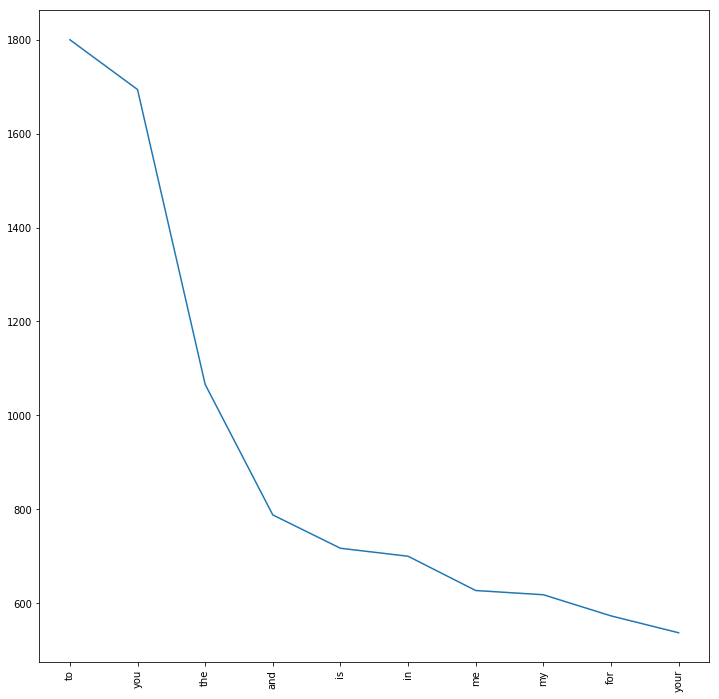

In [145]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 12, 12
plt.plot(g.index, g['total'])
plt.xticks(rotation=90)
plt.show()


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS


np.random.seed(42)


a = ENGLISH_STOP_WORDS

count_vect = CountVectorizer(stop_words = a)
count_data_train_transformed = count_vect.fit_transform(data_train['Lower Case Text'])
count_data_test_transformed = count_vect.transform(data_test['Lower Case Text'])

#label_name =  y 
#pass in transformed data
#ex for LR: parameters = {'penalty': ['l1', 'l2'], 'C': [1, 5, 10], 'probability': [True]}
def crossval(dataset, label_name, model, parameters):
    aucs = {}
    folds = list(KFold(n_splits=5).split(dataset))
    for fold in range(k):
        cv_train = dataset.iloc[folds[fold][0]]
        cv_validate = dataset.iloc[folds[fold][1]]
    
        countToIncrease = cv_train[cv_train['y'] == 0].shape[0] - cv_train[cv_train['y'] == 1].shape[0]
        spamupsampled = cv_train[cv_train['y'] == 1].sample(n=countToIncrease, replace=True)
        cv_train = pd.concat([spamupsampled, cv_train])

        cv_train_features = cv_train.drop(label_name, axis = 1)
        cv_train_y = cv_train[label_name]
        cv_validate_features = cv_validate.drop(label_name, axis = 1)
        cv_validate_y = cv_validate[label_name]
        
        keys, values = zip(*parameters.items())
                
        for v in itertools.product(*values):    
            experiment = dict(zip(keys, v))
            m = model(**experiment)

            m.fit(cv_train_features, cv_train_y)
            y_preds = m.predict_proba(cv_validate_features)[:, 1]
            fpr, tpr, threshold = metrics.roc_curve(cv_validate_y, y_preds)
            auc_val = metrics.auc(fpr, tpr)  
            
            inside_key = ""

            for e in experiment:
                inside_key = inside_key + "_" + e + ':' + str(experiment[e])
            
            if not inside_key in aucs:
                aucs[inside_key] = []
                aucs[inside_key].append(auc_val)
            else:
                aucs[inside_key].append(auc_val)
    return aucs